# Ciencia de Datos: Uso del teléfono en Adolescentes

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from scipy.stats import mode
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE





In [149]:
#limpieza y cargar la base de datos
df = pd.read_csv("../data/data.csv")

df.drop(columns=['ID', 'Name'], inplace=True)

df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   Location                3000 non-null   object 
 3   School_Grade            3000 non-null   object 
 4   Daily_Usage_Hours       3000 non-null   float64
 5   Sleep_Hours             3000 non-null   float64
 6   Academic_Performance    3000 non-null   int64  
 7   Social_Interactions     3000 non-null   int64  
 8   Exercise_Hours          3000 non-null   float64
 9   Anxiety_Level           3000 non-null   int64  
 10  Depression_Level        3000 non-null   int64  
 11  Self_Esteem             3000 non-null   int64  
 12  Parental_Control        3000 non-null   int64  
 13  Screen_Time_Before_Bed  3000 non-null   float64
 14  Phone_Checks_Per_Day    3000 non-null   

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


In [150]:
#valores duplicados
df.duplicated().sum()
df.isna().sum()


Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64

In [151]:
#descripcion de valores
df.describe(include='all')

,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000,3000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,...,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000
unique,NaN,3,2726,6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,Male,North Michael,12th,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Browsing,NaN,NaN,NaN
freq,NaN,1016,6,529,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,627,NaN,NaN,NaN
mean,15.969667,NaN,NaN,NaN,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,...,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,NaN,5.459667,6.015100,8.881900
std,1.989489,NaN,NaN,NaN,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,...,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,NaN,2.864572,2.014776,1.609598
min,13.000000,NaN,NaN,NaN,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,...,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,1.000000
25%,14.000000,NaN,NaN,NaN,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,...,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,NaN,3.000000,4.700000,8.000000
50%,16.000000,NaN,NaN,NaN,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,...,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,NaN,5.000000,6.000000,10.000000
75%,18.000000,NaN,NaN,NaN,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,...,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,NaN,8.000000,7.400000,10.000000


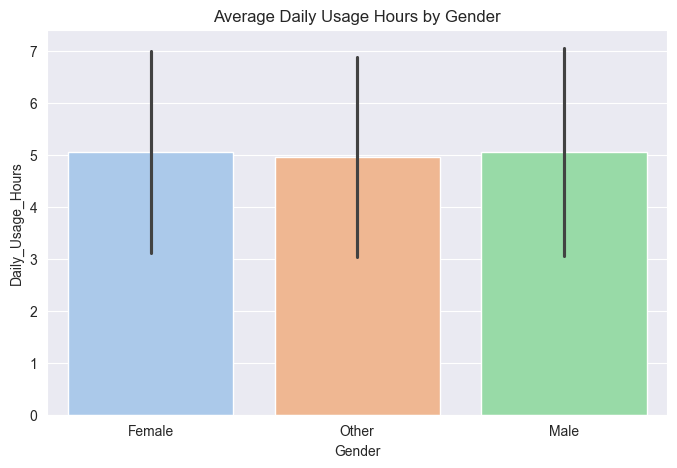

In [152]:
#uso diario por genero
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Gender', y='Daily_Usage_Hours', hue='Gender',
            palette='pastel', errorbar='sd', legend=False)
plt.title('Average Daily Usage Hours by Gender')
plt.show()



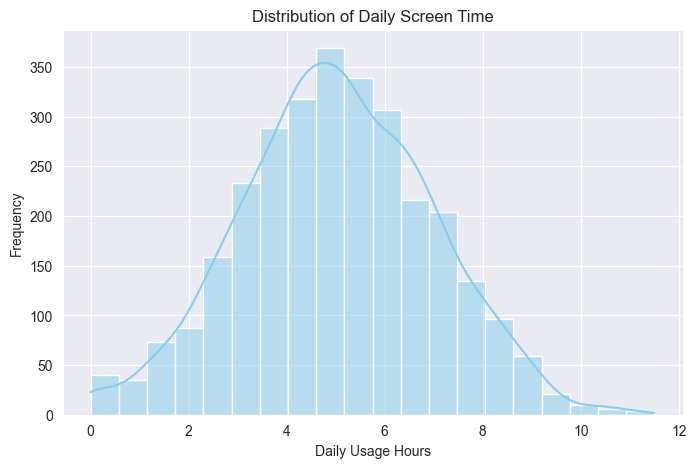

In [153]:
#distribucion de horas de uso
plt.figure(figsize=(8,5))
sns.histplot(df['Daily_Usage_Hours'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


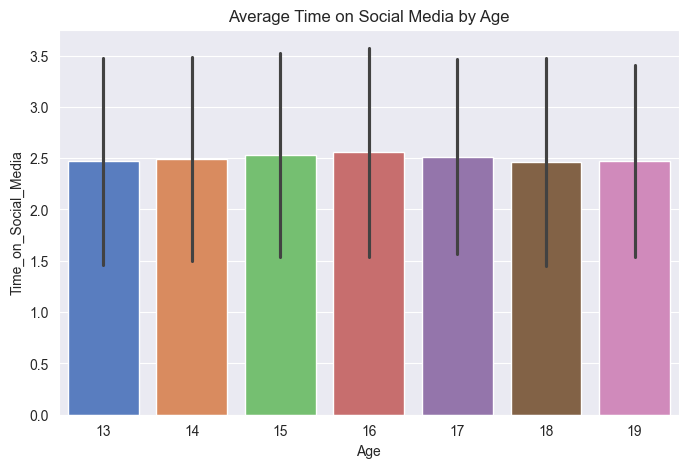

In [154]:
#tiempo en redes vs la edad
plt.figure(figsize=(8,5))
sns.barplot(
    data=df,
    x='Age',
    y='Time_on_Social_Media',
    hue='Age',          # requerido para evitar el warning del palette
    errorbar='sd',      # reemplaza ci='sd'
    palette='muted',
    legend=False        # oculta la leyenda duplicada
)
plt.title('Average Time on Social Media by Age')
plt.show()



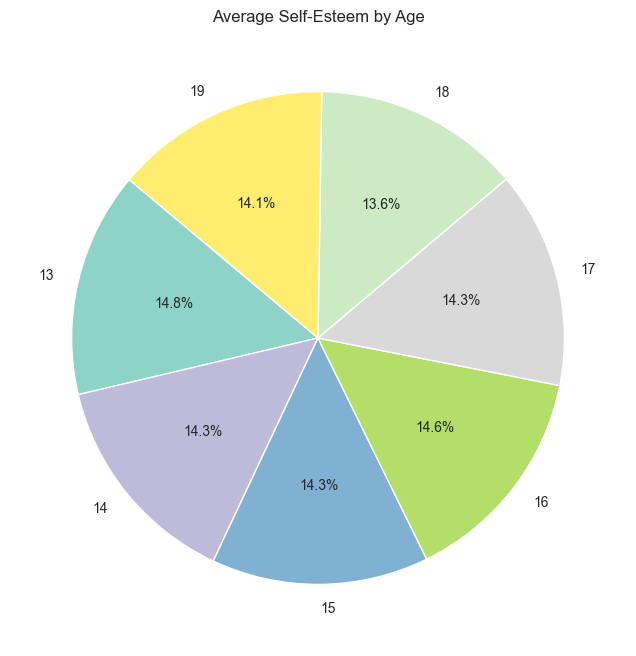

In [155]:
#nivel de autoestima por edad
age_self_esteem = df.groupby('Age')['Self_Esteem'].mean()
plt.figure(figsize=(8,8))
age_self_esteem.plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    cmap='Set3'
)
plt.title('Average Self-Esteem by Age')
plt.ylabel('')
plt.show()



<Axes: xlabel='Daily_Usage_Hours', ylabel='Addiction_Level'>

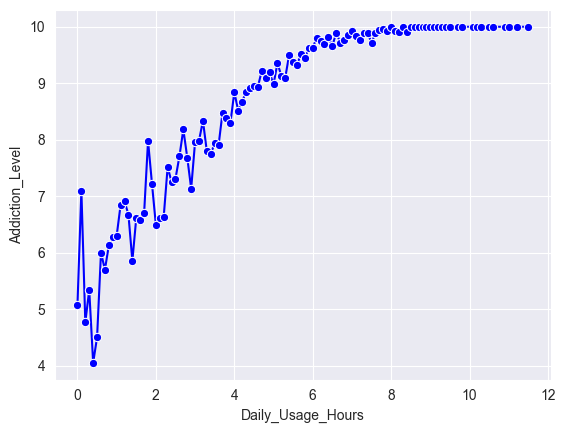

In [156]:
#horas  diarias  vs el nivel de adiccion
grouped_df = df.groupby('Daily_Usage_Hours')['Addiction_Level'].mean().reset_index()
sns.lineplot(data=grouped_df, x='Daily_Usage_Hours', y='Addiction_Level', marker='o', color='blue')


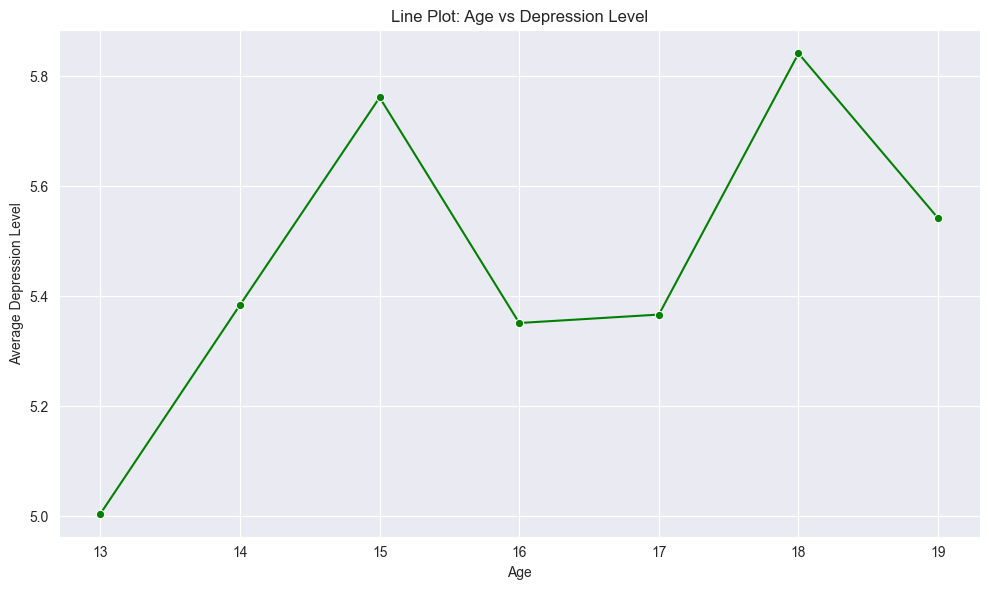

In [157]:
# edad vs dpresion
grouped_df = df.groupby('Age')['Depression_Level'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Depression_Level', marker='o', color='green')
plt.title('Line Plot: Age vs Depression Level')
plt.xlabel('Age')
plt.ylabel('Average Depression Level')
plt.grid(True)
plt.tight_layout()
plt.show()

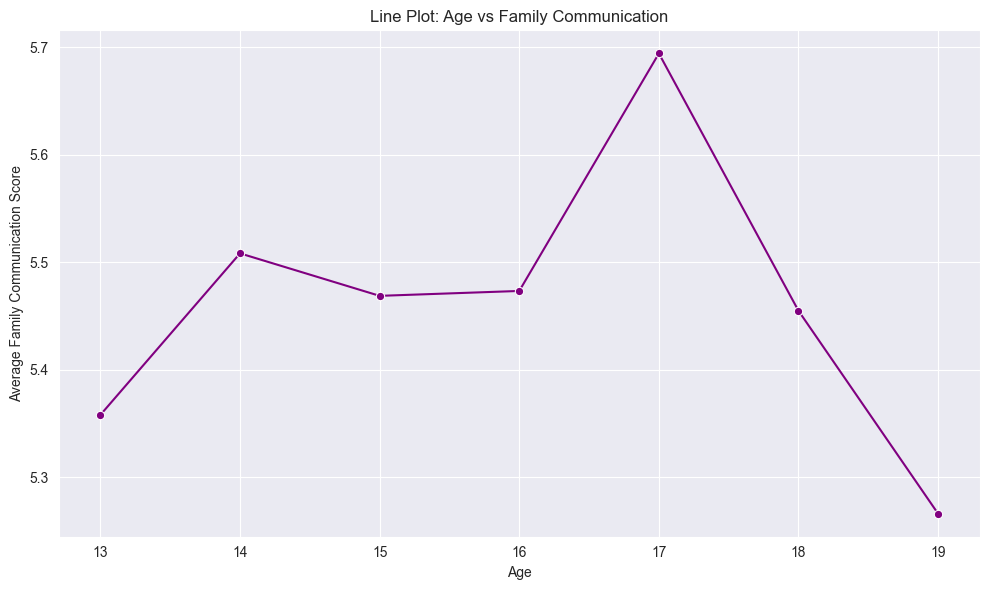

In [158]:

grouped_df = df.groupby('Age')['Family_Communication'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Age', y='Family_Communication', marker='o', color='purple')
plt.title('Line Plot: Age vs Family Communication')
plt.xlabel('Age')
plt.ylabel('Average Family Communication Score')
plt.grid(True)
plt.tight_layout()
plt.show()

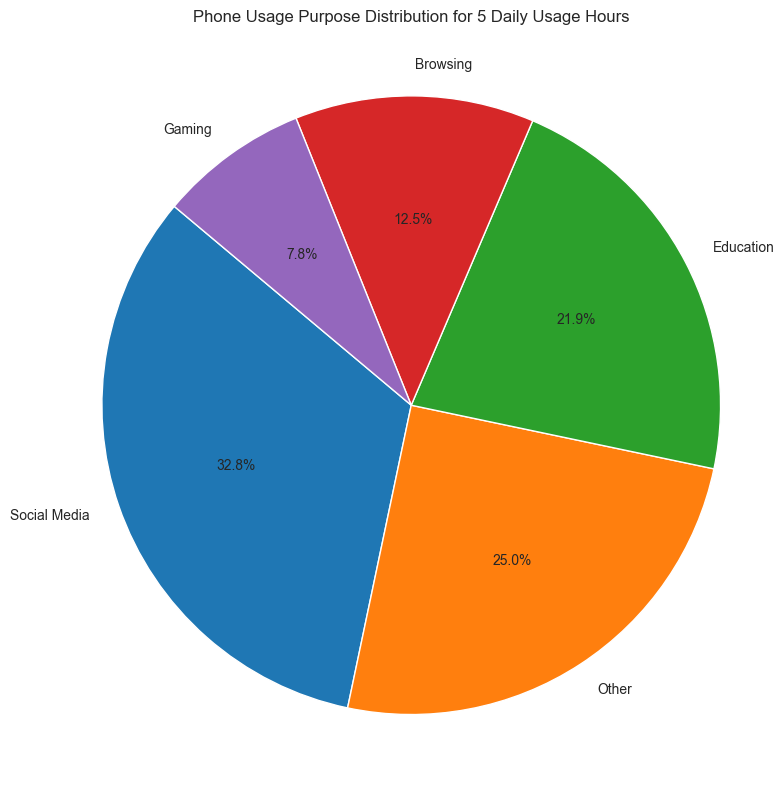

In [159]:
#grafico para ver en 5 horas que cuanto porcentaje estan haciendo cierta actividad
usage_hour = 5
filtered_df = df[df['Daily_Usage_Hours'] == usage_hour]

# Count Phone Usage Purpose distribution
purpose_counts = filtered_df['Phone_Usage_Purpose'].value_counts()

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(purpose_counts, labels=purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Phone Usage Purpose Distribution for {usage_hour} Daily Usage Hours')
plt.axis('equal')
plt.tight_layout()
plt.show()

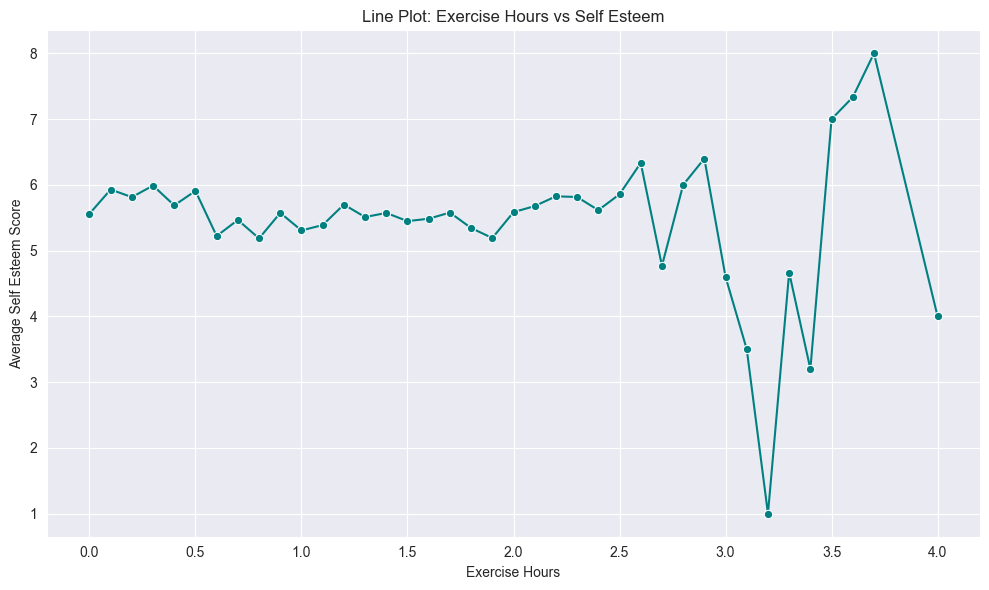

In [160]:
# ejercicio vs autoestima
grouped_df = df.groupby('Exercise_Hours')['Self_Esteem'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Self_Esteem', marker='o', color='teal')
plt.title('Line Plot: Exercise Hours vs Self Esteem')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Self Esteem Score')
plt.grid(True)
plt.tight_layout()
plt.show()

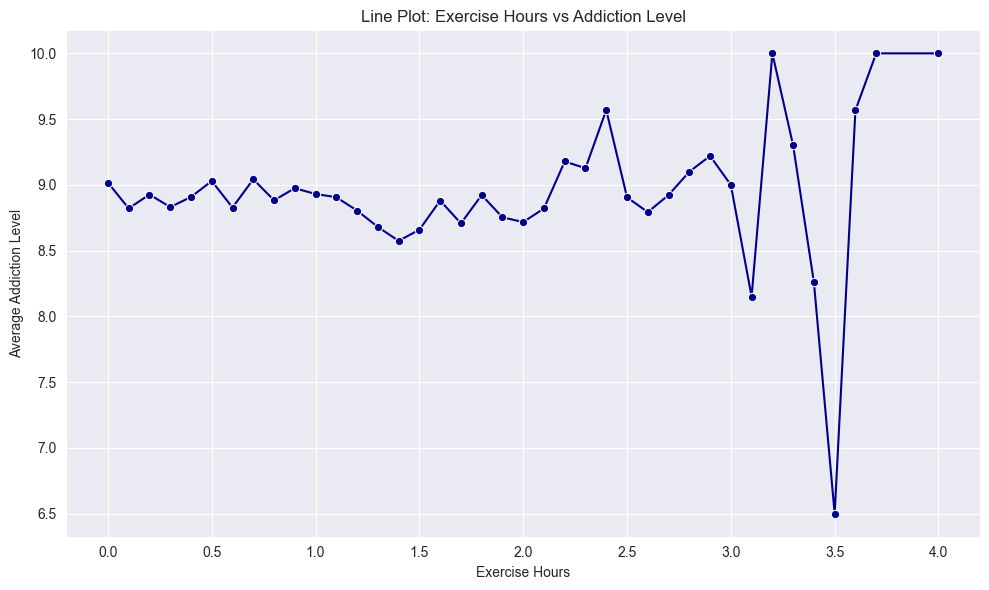

In [161]:
# ejercicio vs adiccion
grouped_df = df.groupby('Exercise_Hours')['Addiction_Level'].mean().reset_index()

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Exercise_Hours', y='Addiction_Level', marker='o', color='darkblue')
plt.title('Line Plot: Exercise Hours vs Addiction Level')
plt.xlabel('Exercise Hours')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.tight_layout()
plt.show()

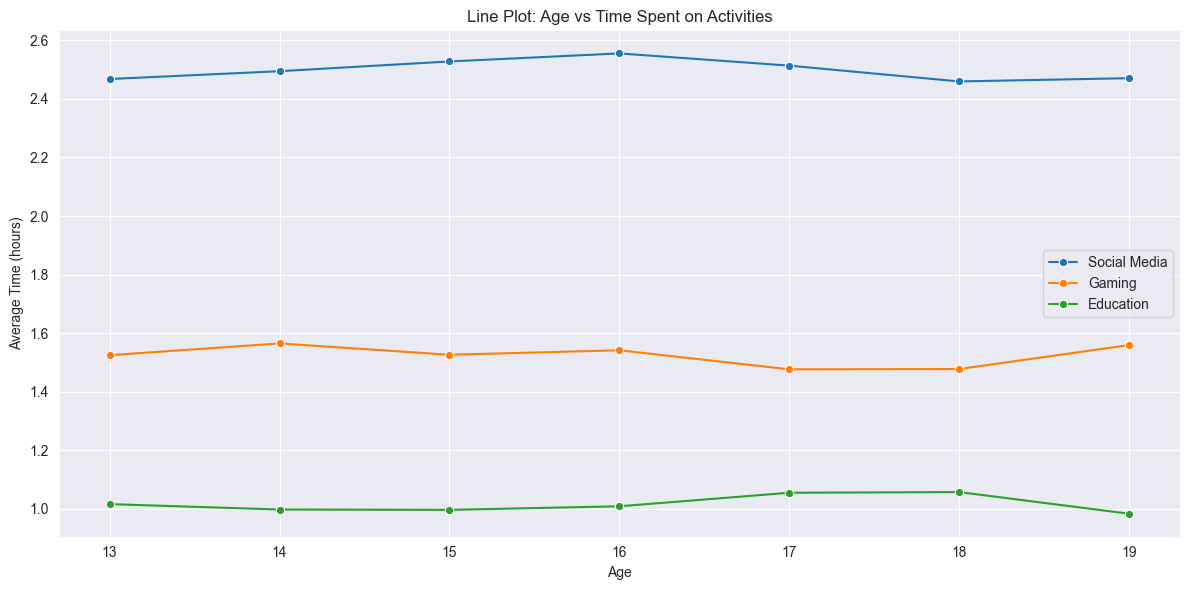

In [162]:
#actividades por edad
grouped_df = df.groupby('Age')[['Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']].mean().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Social_Media', marker='o', label='Social Media')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Gaming', marker='o', label='Gaming')
sns.lineplot(data=grouped_df, x='Age', y='Time_on_Education', marker='o', label='Education')

plt.title('Line Plot: Age vs Time Spent on Activities')
plt.xlabel('Age')
plt.ylabel('Average Time (hours)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

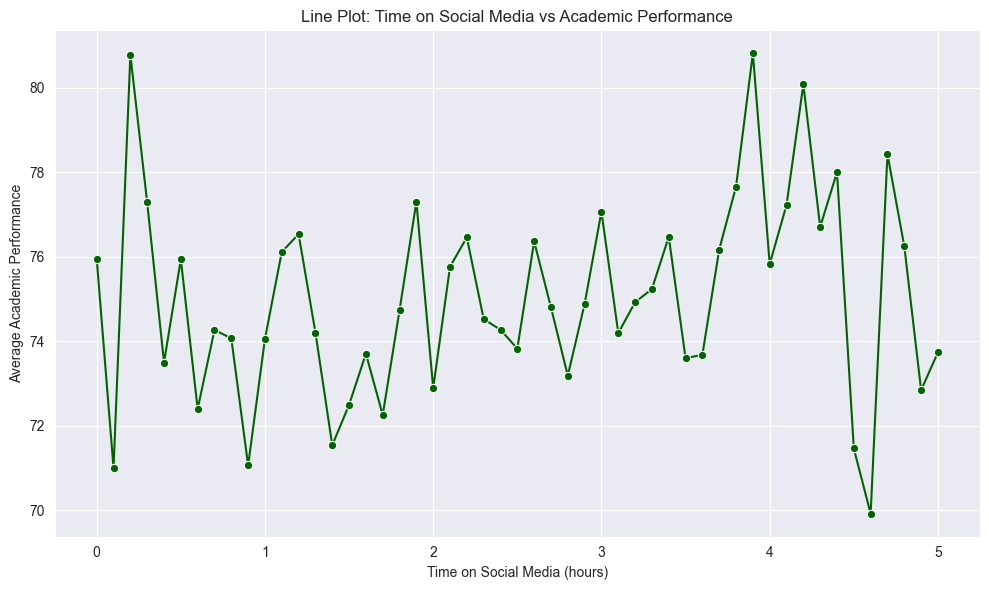

In [163]:
#Redes vs rendimiento académico
grouped_df = df.groupby('Time_on_Social_Media')['Academic_Performance'].mean().reset_index()

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=grouped_df, x='Time_on_Social_Media', y='Academic_Performance', marker='o', color='darkgreen')
plt.title('Line Plot: Time on Social Media vs Academic Performance')
plt.xlabel('Time on Social Media (hours)')
plt.ylabel('Average Academic Performance')
plt.grid(True)
plt.tight_layout()
plt.show()


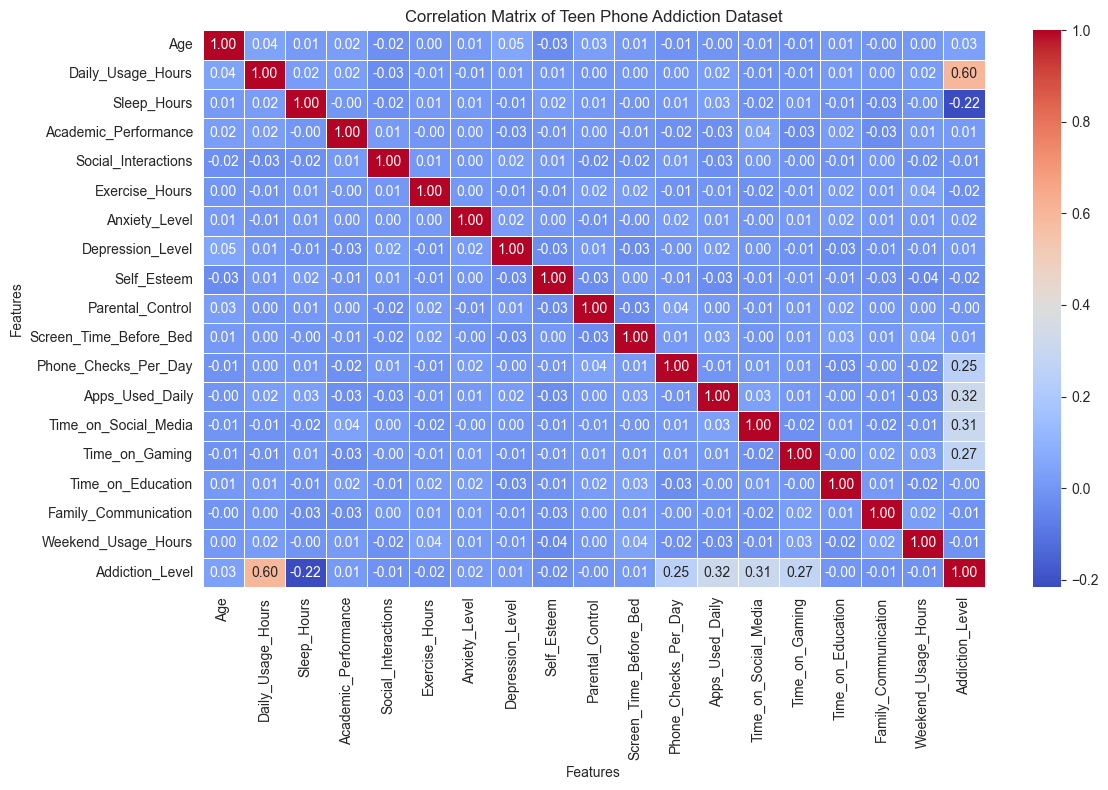

In [164]:
#matriz de correlacion
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [165]:
numerical_vars = df.select_dtypes(include=["int64", "float64"]).columns
numerical_vars


Index(['Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Family_Communication', 'Weekend_Usage_Hours', 'Addiction_Level'],
      dtype='object')

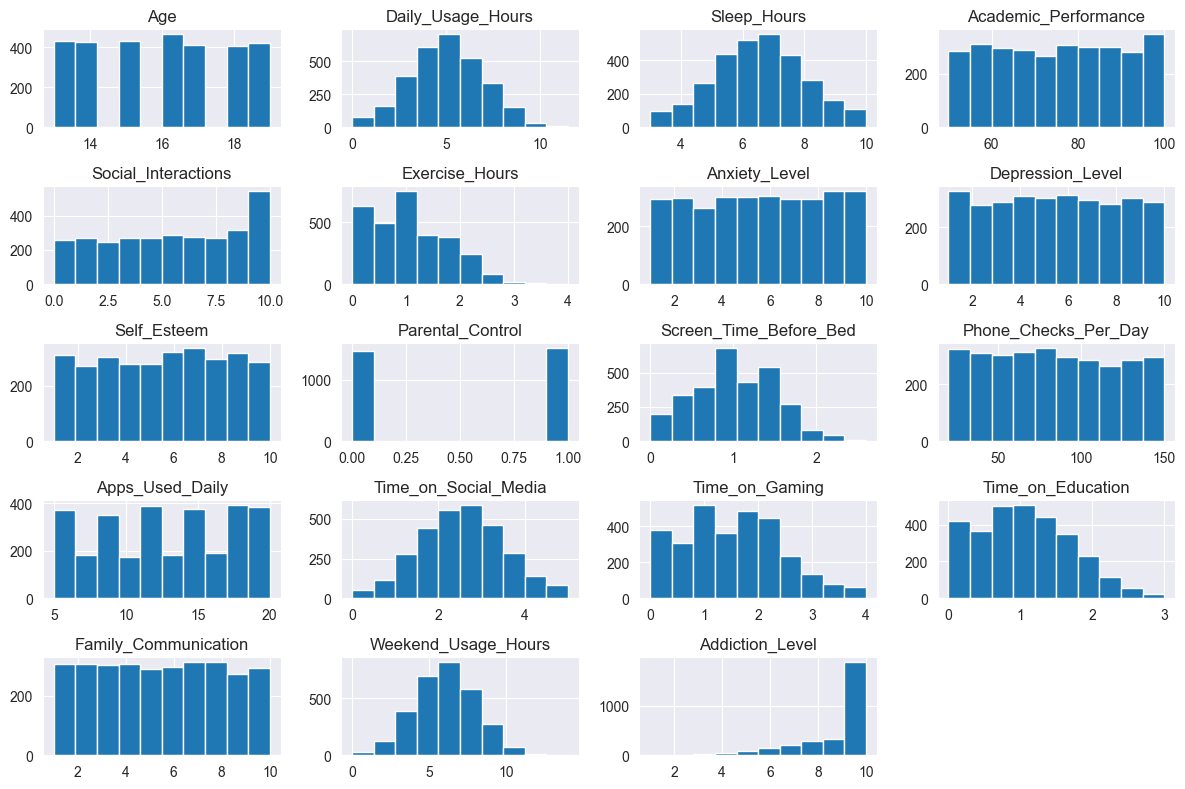

In [166]:
#histogramas
df.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

## Matriz de gráficos de dispersión respecto al nivel de adicción

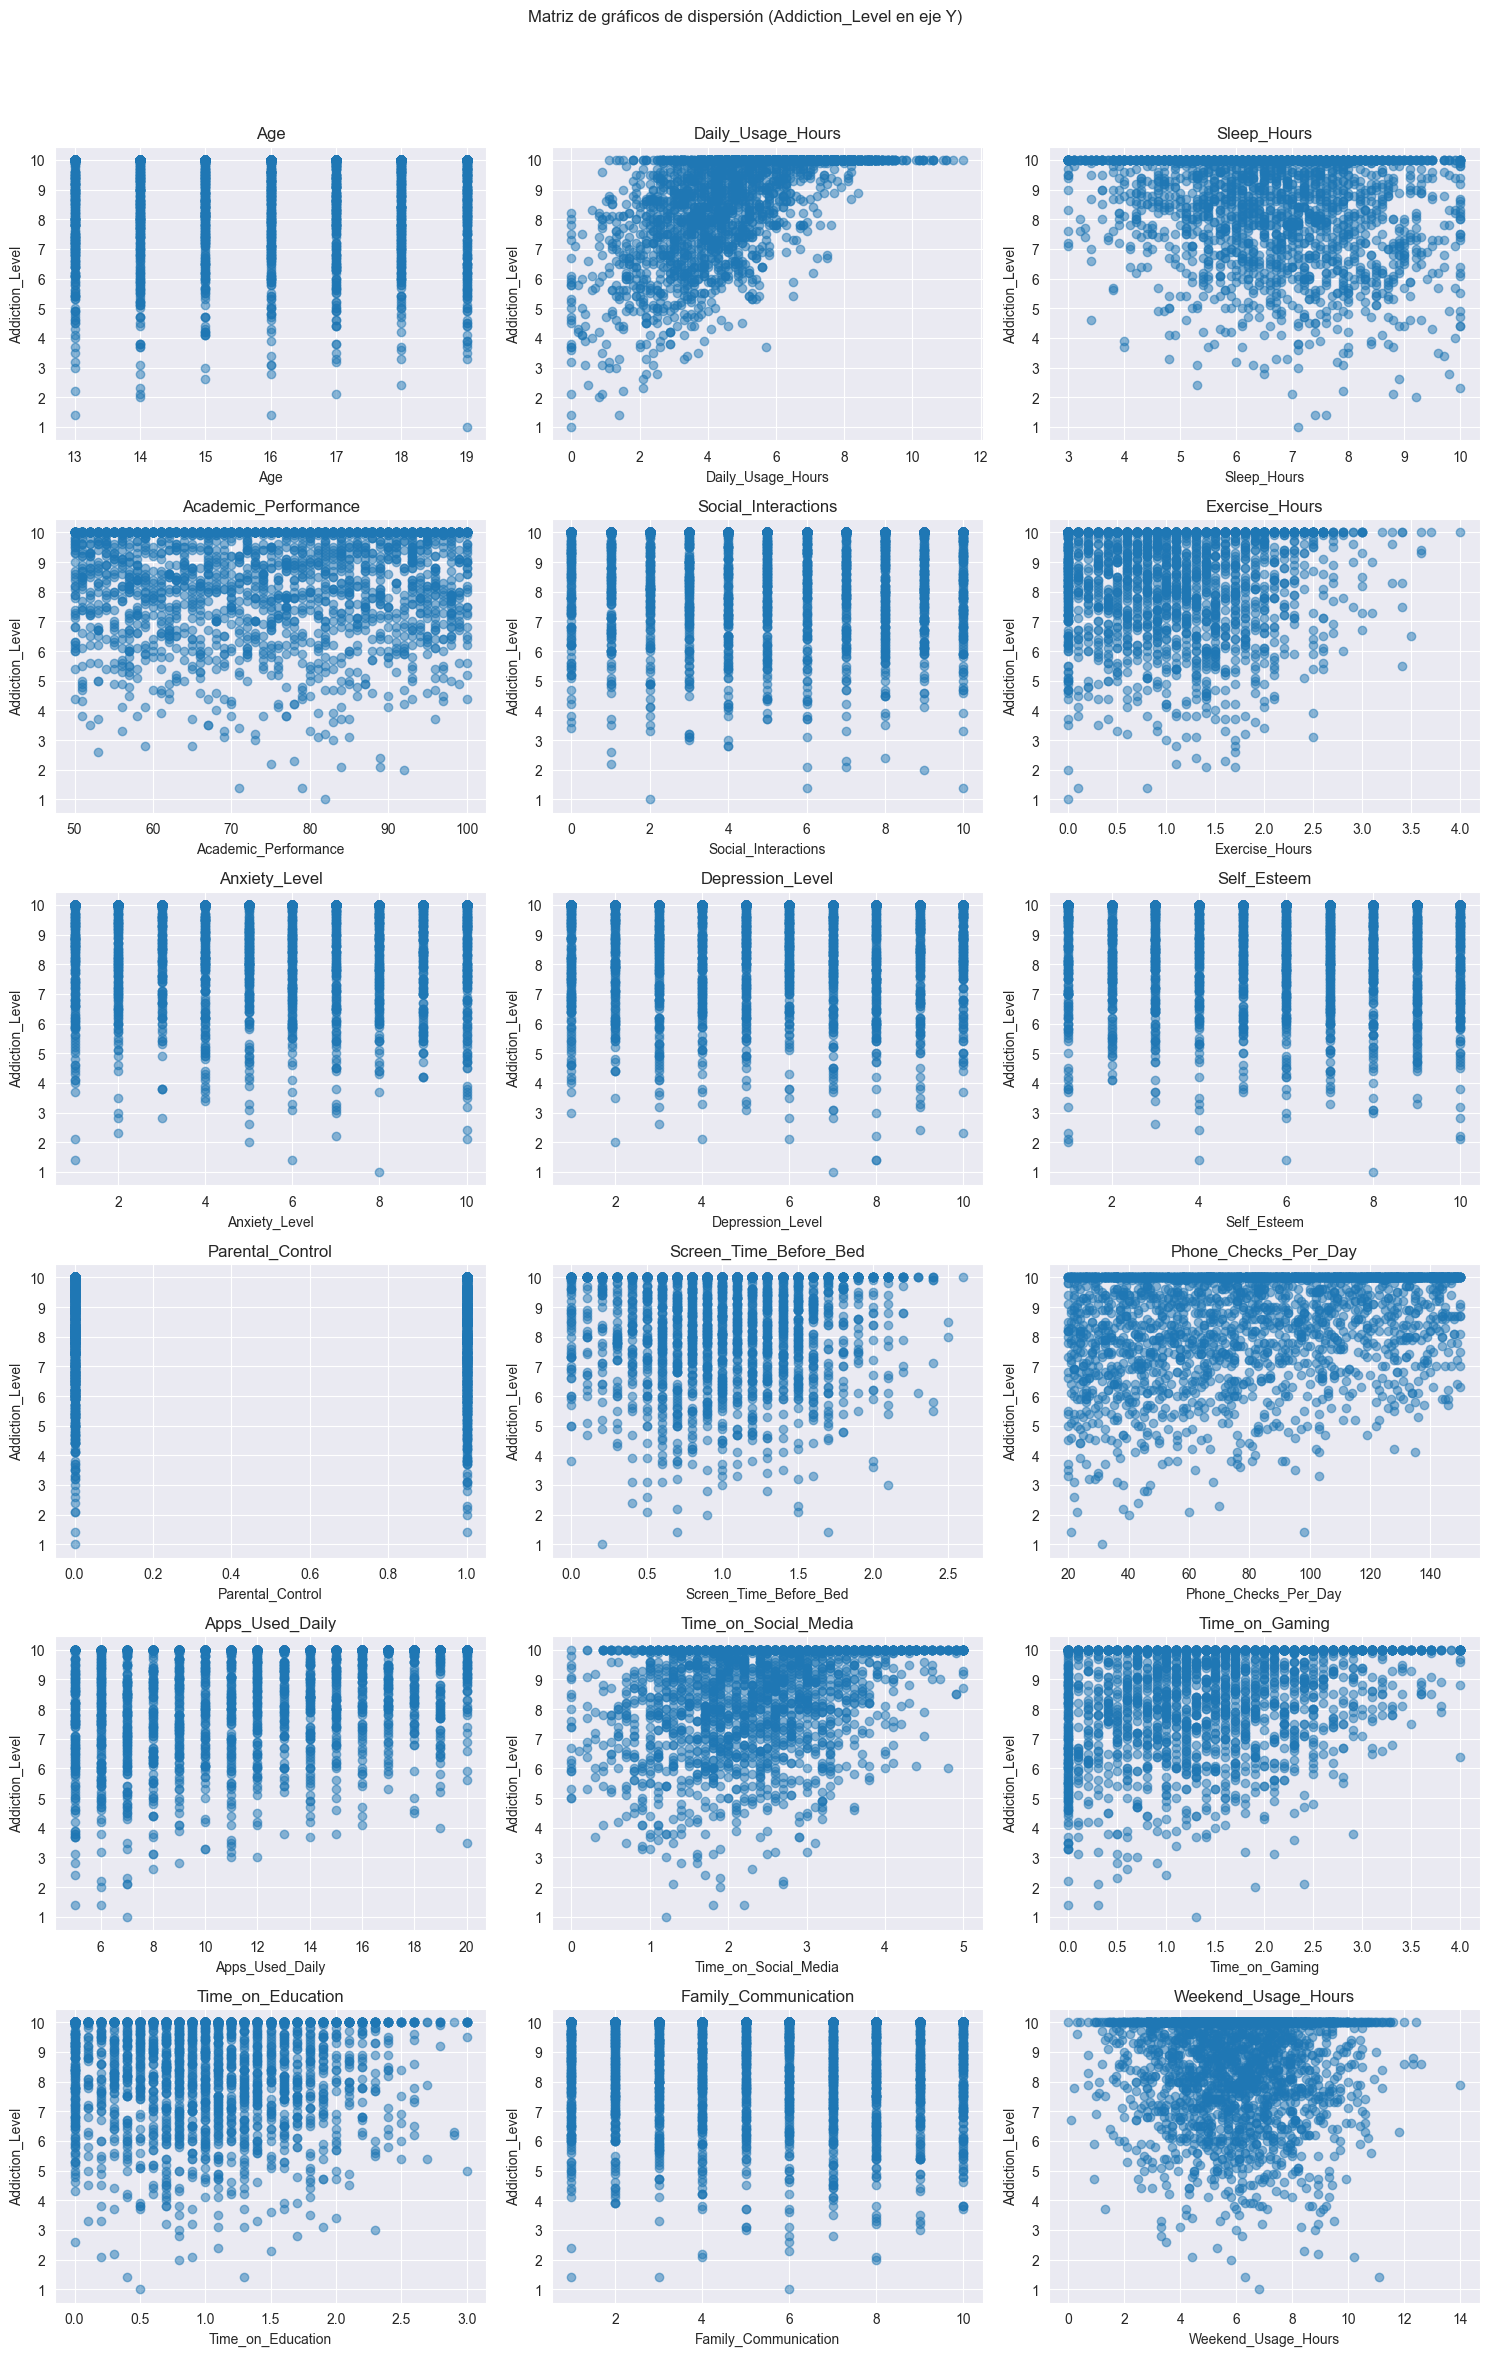

In [167]:
plot_matriz_dispersion(df)

In [168]:
# crear categorias para realizar el
df['Addiction_Level_Category'] = pd.cut(df['Addiction_Level'],
    bins=[-np.inf, 3.5, 7.5, np.inf],
    labels=[0, 1, 2]
)
df.drop(columns=['Addiction_Level'], inplace=True)
df.rename(columns={'Addiction_Level_Category': 'Addiction_Level'}, inplace=True)


In [169]:
target_col = 'Addiction_Level'
class_counts = df[target_col].value_counts()
valid_classes = class_counts[class_counts >= 2].index
df = df[df[target_col].isin(valid_classes)]


In [170]:
#categoricas a numericas
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [171]:
# columna entrada y columna que se predecir
X = df.drop(target_col, axis=1)
y = df[target_col].astype(int)


In [172]:
#estandarizacion de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [173]:
# entrenar el modelo
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

In [174]:
#modelos a utilizar
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
}

In [175]:
# numero de personas que tiene adiccion media, alta y baja
df['Addiction_Level'].value_counts()


Addiction_Level
2    2418
1     556
0      26
Name: count, dtype: int64

In [176]:
# utilizar smote para balancear el dataset y hacer mejores predicciones
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("Distribución antes del SMOTE:")
print(y_train.value_counts())

print("\nDistribución después del SMOTE:")
print(y_train_res.value_counts())

Distribución antes del SMOTE:
Addiction_Level
2    1934
1     445
0      21
Name: count, dtype: int64

Distribución después del SMOTE:
Addiction_Level
2    1934
1    1934
0    1934
Name: count, dtype: int64


In [187]:
#modelos utilizando  smote
for name, model in models.items():
    print(f"\n🔍 Training {name}...")
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(" Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(" Classification Report:")
    print(classification_report(y_test, y_pred))

    results[name] = acc



🔍 Training Logistic Regression...
Accuracy: 0.9733
 Confusion Matrix:
[[  5   0   0]
 [  2 108   1]
 [  0  13 471]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83         5
           1       0.89      0.97      0.93       111
           2       1.00      0.97      0.99       484

    accuracy                           0.97       600
   macro avg       0.87      0.98      0.92       600
weighted avg       0.98      0.97      0.97       600


🔍 Training Random Forest...
Accuracy: 0.9350
 Confusion Matrix:
[[  1   4   0]
 [  0  87  24]
 [  0  11 473]]
 Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.85      0.78      0.82       111
           2       0.95      0.98      0.96       484

    accuracy                           0.94       600
   macro avg       0.93      0.65      0.70       600
weighted avg     

In [178]:
#resultados de los modelos
results_df = pd.DataFrame(list(results.items()),
                          columns=["Model", "Accuracy"]).sort_values(
    by="Accuracy", ascending=False
)
print(results_df)


                 Model  Accuracy
0  Logistic Regression  0.973333
1        Random Forest  0.940000


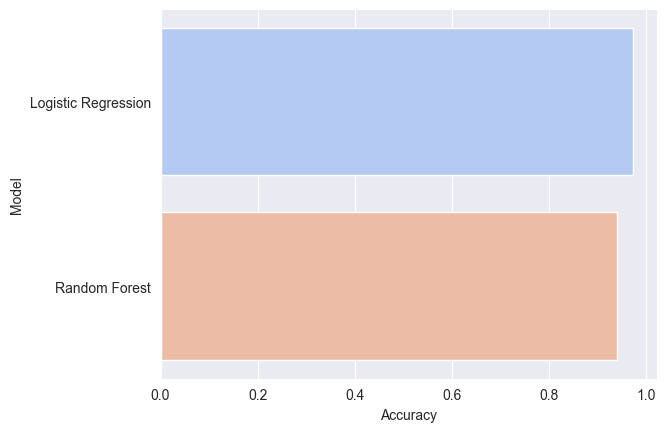

In [189]:
#grafico de barras para lso dos modelos utilizados
sns.barplot(
    x="Accuracy",
    y="Model",
    data=results_df,
    hue="Model",
    dodge=False,
    palette="coolwarm"
)

plt.legend([],[], frameon=False)  # elimina la leyenda
plt.show()



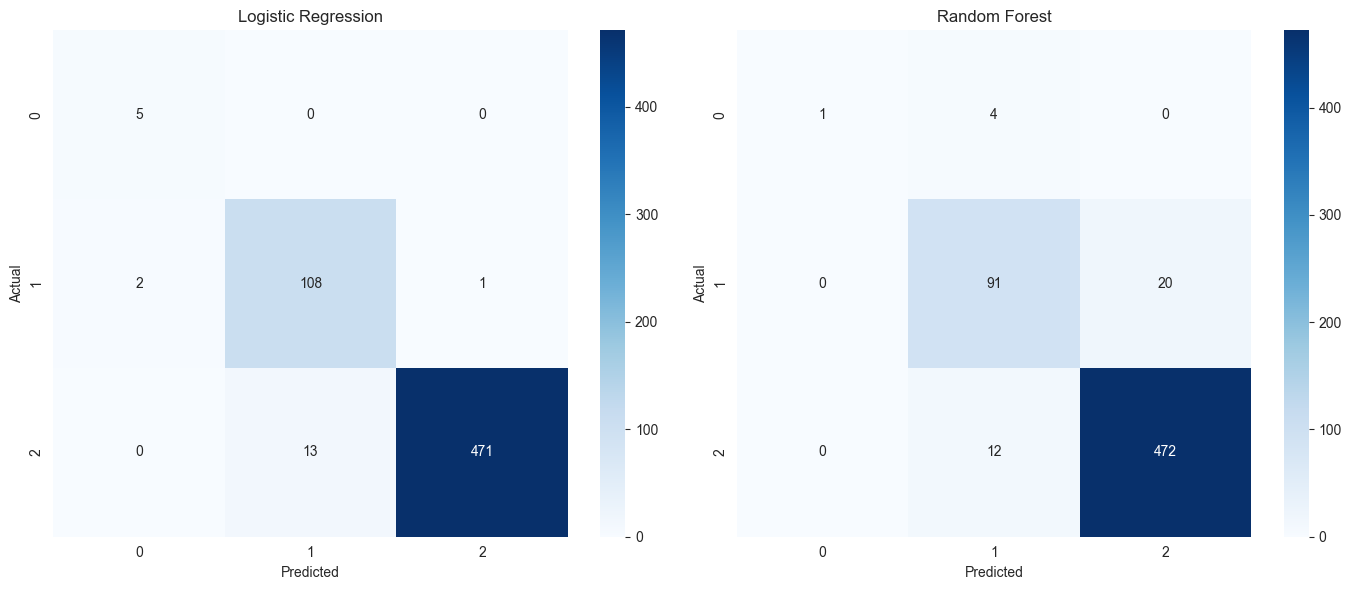

In [180]:
#matrices de confusion
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

for idx, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[idx])
    axes[idx].set_title(f'{name}')
    axes[idx].set_xlabel('Predicted')
    axes[idx].set_ylabel('Actual')

plt.tight_layout()
plt.show()


# Conclusiones Principales del Análisis

## 1. Rendimiendo del modelo de prediccion de adiccion de uso del telefono
Precisión
del modelo: el
modelo
de
regresion
muestra
una
buen
funcionamiento
Matriz
de
confusión:
- Verdaderos
Negativos: muestra
3
casos
sin
adiccion
correctamente
identificados
- Falsos
Positivos: muestra
25
casos
de
addicion
sin
serlo
- Falsos
Negativos: muestra
8
casos
sin
identificarlos
- Verdaderos
Positivos: muestra
864
casos
de
adiccion
correctamente
identificados
Tasa
de
acierto: ~96.3 %

## 2. Distribución de Uso Diario
- La
mayoría
de
adolescentes
presenta
patrones
de
uso
elevado
del teléfono
- La
distribución
de
horas
de
uso
muestra
concentración
en
rangos
específicos
- Existe
una
clara
relación
entre
el
tiempo
de
uso
y
el
nivel
de
adicción

## 3. Variables más Relevantes
### Basado en los gráficos de distribución y dispersión:
- la
edad
es
un
factor
importante
en
los
patrones
de
uso
- Horas
de
uso
diario: Variable
crítica
directamente
relacionada
con
adicción
- Horas
de
sueño: Correlación
inversa
con
el
uso
excesivo
- Rendimiento
académico: Afectado
negativamente
por
alto
uso
del teléfono
- Interacciones
sociales: Patrones
diferenciados
según
nivel
de
adicción
- Niveles
de
ansiedad
y
depresión: Asociados
con
mayor
uso
del dispositivo
- Autoestima: Tendencia
a
ser
menor
en
casos
de
adicción

## 4. Implicaciones Prácticas
- El
modelo
puede
identificar
efectivamente
casos
de
riesgo
de
adicción
- La
tasa
de
falsos
positivos(25
casos) sugiere
precaución
en
intervenciones
- Los
8
falsos
negativos
representan
casos
que
requieren
atención
adicional
- El
monitoreo
de
horas
de
uso
diario
es
un
indicador
clave
temprano

## 5. Recomendaciones
- Implementar
sistemas
de
alerta
temprana
basados
en
horas
de
uso
- Considerar
múltiples
variables
para
evaluación
integral
- Desarrollar
programas
de
intervención
focalizados
en
grupos
de
riesgo
- Promover
hábitos
saludables: sueño
adecuado, ejercicio
y
comunicación
familiar